In [ ]:
from fastai import *
from fastai.vision import *

from mish import Mish

import warnings
warnings.filterwarnings('ignore', message='ufunc size changed')
warnings.filterwarnings('ignore', message='Default grid_sample and affine_grid behavior will be changed ')

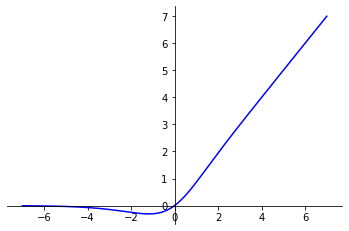

In [ ]:
# Code to plot the mish function
x = np.linspace(-7, 7, 700)
y = x * np.tanh(np.log(1 + np.exp(x)))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, 'b')

# plt.savefig(fname='/home/kushaj/Desktop/Temp/SOTA/images/mish_plot.png', dpi=1200)

In [ ]:
# Create a function to return the head of our model
def get_head(act_fn='relu'):
    if act_fn == 'relu':
        fn = nn.ReLU(inplace=True)
    else:
        fn = Mish()
        
    head = nn.Sequential(
        AdaptiveConcatPool2d(),
        Flatten(),
        nn.BatchNorm1d(4096),
        nn.Dropout(p=0.25),
        nn.Linear(in_features=4096, out_features=512),
        fn,
        nn.BatchNorm1d(512),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=512, out_features=100)
    )
    
    return head

## 1. Test on CIFAR10 using Mish

In [ ]:
data = (ImageList.from_folder('/home/kushaj/Desktop/Data/cifar10')
                 .split_by_folder()
                 .label_from_folder()
                 .transform(get_transforms(), size=(32, 32))
                 .databunch(bs=64, val_bs=128, num_workers=8)
                 .normalize(imagenet_stats))

### 1.1 Run 1 using lr=1e-2

In [ ]:
learn = cnn_learner(data, models.resnet50, custom_head=get_head('mish'), metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.261163,1.001313,0.666000,0.974400,01:37
1,1.107453,0.952795,0.672200,0.971800,01:30
2,0.950224,0.863966,0.709200,0.979100,01:29
3,0.886653,0.818751,0.710400,0.978000,01:35
4,0.793873,1.262784,0.732200,0.976900,01:35
5,0.761756,2.810030,0.762300,0.984300,01:29
6,0.692741,36.579937,0.758400,0.981200,01:31
7,0.645728,7.004126,0.797200,0.988200,01:34
8,0.595067,3.190149,0.808000,0.989500,01:35
9,0.586402,3.149785,0.805000,0.989900,01:32


### 1.2 Run 2 using lr=5e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, custom_head=get_head('mish'), metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=5e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.381547,1.140301,0.609700,0.962300,01:33
1,0.995958,1.046906,0.685100,0.975400,01:33
2,0.958657,0.838521,0.705400,0.978000,01:29
3,0.807884,0.786552,0.730000,0.983800,01:30
4,0.731153,0.676765,0.761000,0.988100,01:30
5,0.698388,0.601249,0.792300,0.989500,01:33
6,0.640909,0.572659,0.802700,0.990600,01:30
7,0.558170,0.523403,0.819600,0.992200,01:29
8,0.574149,0.538872,0.811600,0.991600,01:29
9,0.537346,0.526026,0.816100,0.991100,01:29


### 1.3 Run 3 using lr=1e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, custom_head=get_head('mish'), metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.069461,1.548645,0.489200,0.919000,01:28
1,1.244028,1.067164,0.636600,0.968700,01:26
2,0.955422,0.806978,0.714200,0.983100,01:26
3,0.818216,0.704292,0.760500,0.986500,01:26
4,0.726957,0.626589,0.786500,0.987100,01:26
5,0.654030,0.593297,0.793500,0.989300,01:26
6,0.638520,0.560080,0.803800,0.991900,01:26
7,0.595579,0.548331,0.810500,0.991700,01:26
8,0.573162,0.531419,0.814700,0.991900,01:28
9,0.565755,0.520132,0.817200,0.992200,01:28


## 2. Test on CIFAR100 using Mish

In [ ]:
data = (ImageList.from_folder('/home/kushaj/Desktop/Data/cifar100')
                 .split_by_folder()
                 .label_from_folder()
                 .transform(get_transforms(), size=(32, 32))
                 .databunch(bs=64, val_bs=128, num_workers=8)
                 .normalize(imagenet_stats))

### 2.1 Run 1 using lr=1e-2

In [ ]:
learn = cnn_learner(data, models.resnet50, custom_head=get_head('mish'), metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.103673,2.829734,0.321000,0.645300,01:32
1,2.578551,2.326873,0.375800,0.711600,01:28
2,2.434867,2.263561,0.392600,0.726800,01:28
3,2.248022,2.126438,0.429700,0.750800,01:29
4,2.163731,1.878613,0.484000,0.795200,01:29
5,1.991196,1.794288,0.503100,0.809300,01:29
6,1.827452,1.693967,0.528100,0.830600,01:29
7,1.749329,1.600763,0.555800,0.841600,01:29
8,1.634265,1.555213,0.562200,0.852000,01:29
9,1.600638,1.541373,0.563400,0.854000,01:29


### 2.2 Run 2 using lr=5e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, custom_head=get_head('mish'), metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=5e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.405177,2.837604,0.319900,0.633000,01:26
1,2.679032,2.373713,0.386700,0.720600,01:26
2,2.341817,2.038705,0.446700,0.771400,01:26
3,2.116049,1.882577,0.486200,0.795500,01:26
4,1.959244,1.750247,0.510400,0.821100,01:26
5,1.859015,1.640556,0.536900,0.838300,01:26
6,1.756041,1.548635,0.566300,0.851200,01:26
7,1.606179,1.518560,0.571100,0.853500,01:26
8,1.555801,1.475520,0.580600,0.861700,01:26
9,1.513016,1.469505,0.583600,0.862400,01:26


### 2.3 Run 3 using lr=1e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, custom_head=get_head('mish'), metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,4.278705,3.441832,0.227800,0.485900,01:30
1,3.114837,2.517616,0.359400,0.679700,01:29
2,2.487355,2.090531,0.436000,0.764700,01:29
3,2.142925,1.878757,0.485200,0.802800,01:29
4,1.987820,1.766046,0.511800,0.820200,01:29
5,1.854109,1.655216,0.537900,0.837500,01:29
6,1.746219,1.588467,0.552200,0.848500,01:29
7,1.629009,1.569203,0.560900,0.850100,01:29
8,1.605765,1.537737,0.566100,0.851100,01:29
9,1.547742,1.531617,0.568500,0.853200,01:29


## 3. Test on CIFAR10 using ReLU

In [ ]:
data = (ImageList.from_folder('/home/kushaj/Desktop/Data/cifar10')
                 .split_by_folder()
                 .label_from_folder()
                 .transform(get_transforms(), size=(32, 32))
                 .databunch(bs=64, val_bs=128, num_workers=8)
                 .normalize(imagenet_stats))

### 3.1 Run 1 using lr=1e-2

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.202177,1.047354,0.657000,0.971700,01:27
1,1.030405,0.984113,0.676500,0.976500,01:26
2,0.925678,0.874402,0.703100,0.976900,01:27
3,0.861076,0.769443,0.732700,0.986200,01:26
4,0.811286,1.259309,0.751400,0.980900,01:27
5,0.724248,1.576357,0.772900,0.986700,01:26
6,0.665269,1.712569,0.784300,0.989200,01:27
7,0.638452,0.852445,0.799200,0.989900,01:27
8,0.602254,1.571485,0.799500,0.988800,01:26
9,0.598498,0.575635,0.807900,0.989400,01:26


### 3.2 Run 2 using lr=5e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=5e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.405987,1.213449,0.596200,0.958700,01:27
1,1.048463,0.993495,0.694800,0.978800,01:26
2,0.907729,0.796180,0.731300,0.980200,01:26
3,0.782463,0.668819,0.765900,0.986200,01:26
4,0.739498,0.678497,0.763700,0.986100,01:27
5,0.702425,0.590352,0.795400,0.989900,01:26
6,0.632330,0.575299,0.804100,0.990100,01:27
7,0.587140,0.542569,0.815800,0.991500,01:26
8,0.538715,0.520646,0.820200,0.991500,01:27
9,0.530294,0.519070,0.821400,0.992500,01:26


### 3.3 Run 3 using lr=1e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.057110,1.567975,0.490500,0.912500,01:27
1,1.261363,1.039247,0.635200,0.971200,01:26
2,0.953626,0.817323,0.717200,0.982400,01:27
3,0.823715,0.702386,0.752400,0.985800,01:26
4,0.735579,0.613220,0.784000,0.989600,01:27
5,0.691954,0.584098,0.795000,0.989600,01:26
6,0.626717,0.551366,0.808800,0.990300,01:27
7,0.589337,0.545001,0.813900,0.991600,01:26
8,0.565375,0.530526,0.818000,0.991600,01:27
9,0.566847,0.538824,0.814700,0.991400,01:26


## 4. Test on CIFAR100 using ReLU

In [ ]:
data = (ImageList.from_folder('/home/kushaj/Desktop/Data/cifar100')
                 .split_by_folder()
                 .label_from_folder()
                 .transform(get_transforms(), size=(32, 32))
                 .databunch(bs=64, val_bs=128, num_workers=8)
                 .normalize(imagenet_stats))

### 4.1 Run 1 using lr=1e-2

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.084858,2.703411,0.319700,0.642900,01:27
1,2.638090,2.415205,0.366400,0.692900,01:26
2,2.432407,2.256640,0.393700,0.733200,01:26
3,2.228936,2.096543,0.430300,0.758700,01:26
4,2.141676,1.948345,0.462900,0.787600,01:26
5,2.001405,1.839827,0.491000,0.800200,01:28
6,1.851263,1.648080,0.540700,0.835200,01:29
7,1.731178,1.584256,0.551500,0.841900,01:29
8,1.682829,1.559151,0.564000,0.848900,01:32
9,1.596160,1.542830,0.567100,0.851000,01:33


### 4.2 Run 2 using lr=5e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=5e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.413493,2.847238,0.309700,0.618100,01:33
1,2.617081,2.245581,0.401000,0.730500,01:36
2,2.298502,2.090891,0.429900,0.765100,01:33
3,2.122793,1.987798,0.458400,0.773800,01:33
4,1.972701,1.796966,0.503200,0.810000,01:33
5,1.823691,1.641488,0.536700,0.835200,01:33
6,1.728554,1.589461,0.555300,0.846900,01:35
7,1.612827,1.521695,0.568900,0.853700,01:36
8,1.518732,1.483530,0.579300,0.858700,01:38
9,1.473655,1.485058,0.578000,0.860000,01:36


### 4.3 Run 3 using lr=1e-3

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])
learn.fit_one_cycle(10, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,4.319868,3.429283,0.228400,0.485700,01:36
1,3.099142,2.589314,0.351500,0.666500,01:38
2,2.462156,2.109799,0.432300,0.760700,01:36
3,2.157277,1.897773,0.479100,0.801900,01:37
4,1.991416,1.761358,0.515000,0.820100,01:36
5,1.861276,1.636609,0.543600,0.837200,01:36
6,1.771104,1.574756,0.562500,0.847300,01:35
7,1.660457,1.550860,0.568700,0.847600,01:39
8,1.635334,1.518728,0.572900,0.851700,01:38
9,1.605780,1.509423,0.576700,0.855100,01:39


## Visualize output landscape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

In [ ]:
def get_model(act_fn='relu'):
    if act_fn is 'relu':
        fn = nn.ReLU(inplace=True)
    if act_fn is 'mish':
        fn = Mish()
        
    model = nn.Sequential(
        nn.Linear(2, 64),
        fn,
        nn.Linear(64, 32),
        fn,
        nn.Linear(32, 16),
        fn,
        nn.Linear(16, 1),
        fn
    )
    
    return model

In [ ]:
relu_model = get_model('relu')
mish_model = get_model('mish')

x = np.linspace(0., 10., 100)
y = np.linspace(0., 10., 100)

grid = [torch.tensor([xi, yi]) for xi in x for yi in y]

np_img_relu = np.array([relu_model(point).detach().numpy() for point in grid]).reshape(100, 100)
np_img_mish = np.array([mish_model(point).detach().numpy() for point in grid]).reshape(100, 100)

scaler = MinMaxScaler(feature_range=(0, 255))
np_img_relu = scaler.fit_transform(np_img_relu)
np_img_mish = scaler.fit_transform(np_img_mish)

plt.imsave('relu_land.png', np_img_relu)
plt.imsave('mish_land.png', np_img_mish)